In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('blackFriday_train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


# Black Friday Sales Dataset

This dataset contains the sales details of a store. The dataset have 12 attributes (parameters) out of which there are 11 independent variables (User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City, Marital_status, Product_Category_1, Product_Category_2 and Product_Category_3) and 1 dependent variable (Purchase).

The analysis of Independent variables with respect to Dependent variable is done.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225870 entries, 0 to 225869
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     225870 non-null  int64  
 1   Product_ID                  225870 non-null  object 
 2   Gender                      225870 non-null  object 
 3   Age                         225870 non-null  object 
 4   Occupation                  225870 non-null  int64  
 5   City_Category               225870 non-null  object 
 6   Stay_In_Current_City_Years  225870 non-null  object 
 7   Marital_Status              225870 non-null  int64  
 8   Product_Category_1          225869 non-null  float64
 9   Product_Category_2          155760 non-null  float64
 10  Product_Category_3          69140 non-null   float64
 11  Purchase                    225869 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 20.7+ MB


Overall detail of dataset is given through df.info()

1. There are about 67759 samples in dataset.
2. From clear observation, we can see that Product_Category_2 and 3 does not satisfy the samples present and we can conclude that these variables have null values present.
3. The User_Id and Product_ID is not much an influencial to the Purchase made. So, these variables is eliminated.
4. We observe that Age is having object datatype since age is in range and not single number.
5. The variables Product_Category_2 and Product_Category_3 are given as float64 object. This is converted to int64 since it is a categorical value and not a floating number.



# Addressing missing values

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 1
Product_Category_2             70110
Product_Category_3            156730
Purchase                           1
dtype: int64

In [6]:
print([df['Product_Category_2'].unique(), df['Product_Category_3'].unique()])

[array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.]), array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])]


The Product_Category 2 and 3 have a lot of missing values (NaN). Few observations can be made from the uniqueness of it.

1. Since it is a categorical variable, the value has to be unique value. 
2. The mean, median and mode impute method is not necessary since it is not a continuous variable and the value 0 can be assigned.
3. The value zero implies that the product does not come into any category. 

In [7]:
df['Product_Category_2'].fillna(0, inplace = True)
df['Product_Category_3'].fillna(0, inplace = True)

# Conversion of data types

In [8]:
df.Product_Category_2 = df.Product_Category_2.astype('int64')
df.Product_Category_3 = df.Product_Category_3.astype('int64')

In [9]:
df['Stay_In_Current_City_Years'].value_counts()

1     79359
2     41884
3     39177
4+    34942
0     30508
Name: Stay_In_Current_City_Years, dtype: int64

The variable Stay_In_Current_city_years contains the string "4+". For our understanding it can be converted to int64. But since it contains "+" sign, it can be treated as an object itself.

# Data Exploration and Analysis

1. Amount of Purchase based on age

In [10]:
df['Age'].value_counts()

26-35    90062
36-45    45050
18-25    41359
46-50    18523
51-55    15933
55+       8870
0-17      6073
Name: Age, dtype: int64

In [11]:
#df.groupby('Age')['Purchase'].value()

In [12]:
df_age = df.groupby('Age')['Purchase'].mean()
df_age

Age
0-17     9071.934464
18-25    9195.376605
26-35    9299.240914
36-45    9390.007259
46-50    9289.651514
51-55    9631.527019
55+      9397.478016
Name: Purchase, dtype: float64

In [13]:
type(df_age)

pandas.core.series.Series

In [14]:
df_age.values

array([9071.93446402, 9195.37660485, 9299.24091449, 9390.0072586 ,
       9289.65151433, 9631.52701939, 9397.47801578])

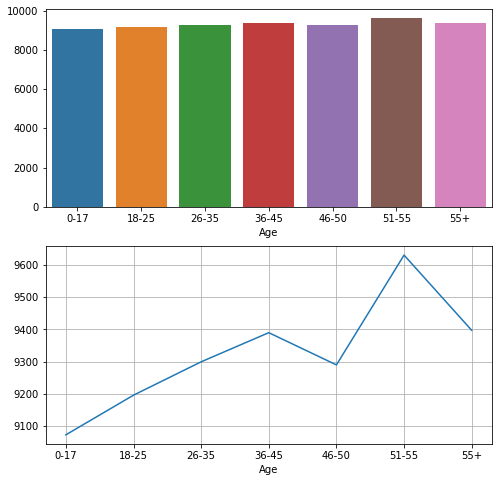

In [15]:
fig, ax = plt.subplots(2, figsize = (8,8))

sns.barplot(df_age.index, df_age.values, ax = ax[0])
sns.lineplot(df_age.index, df_age.values, ax = ax[1], markers = True)
plt.grid()
plt.show()

From age group, We can observe that people with age group of 51-55 has a highest purchase which is about 9534 units while age group of 0-17 has the least purchase.


2. Amount of Purchase based on Gender and Marital status

In [16]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8812.496249
M    9482.939717
Name: Purchase, dtype: float64

From Gender analysis, we can see that Male have made more purchases than Females. 

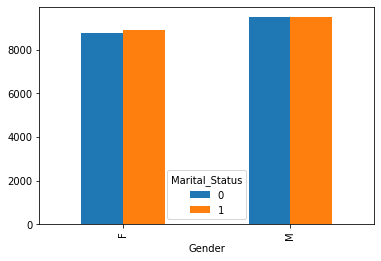

In [17]:
df_gender = df.groupby(['Gender', 'Marital_Status'])['Purchase'].mean()
df_gender.unstack().plot.bar()
plt.show()

From this analysis, we can observe that the Unmarried Male have highest purchases then the rest of the categories.

3. Purchases Based on City

In [18]:
df_city = df.groupby('City_Category')['Purchase'].mean()

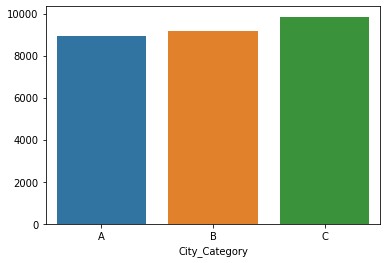

In [19]:
sns.barplot(df_city.index, df_city.values)
plt.show()

Based on the bar graph, we can infer that City_Category 'C' has the highest purchase amount.

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0,0,7969.0


4. Purchases based on Occupation Type

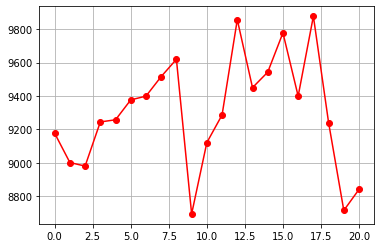

In [33]:
data = df.groupby('Occupation')['Purchase'].mean()
plt.plot(data.index, data.values, 'ro-')
#data.plot.bar()
plt.grid()
plt.show()

From the Occupation graph, we can observe few things:

1. People having Occupation type 9 has the least amount of purchases probably because their salaries are low.
2. People with occupation type 12, 15, 17 have highest amount of purchases.

5. Purchases based on Product_Category

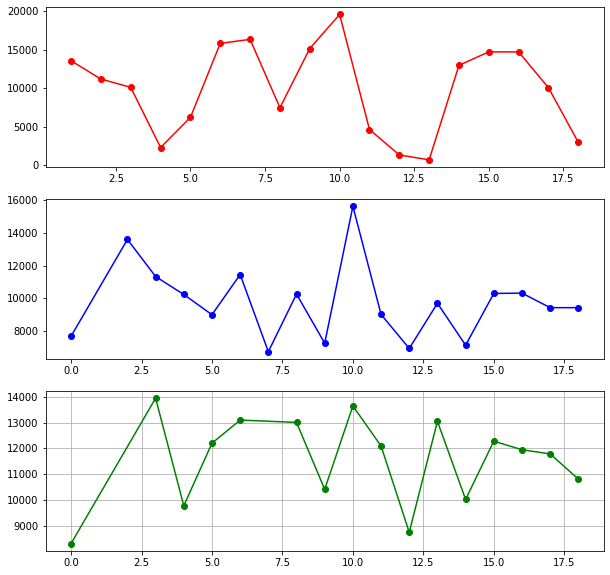

In [22]:
data_pc1 = df.groupby('Product_Category_1')['Purchase'].mean()
data_pc2 = df.groupby('Product_Category_2')['Purchase'].mean()
data_pc3 = df.groupby('Product_Category_3')['Purchase'].mean()

fig, ax = plt.subplots(3, figsize = (10, 10))

ax[0].plot(data_pc1, 'ro-')
ax[1].plot(data_pc2, 'bo-')
ax[2].plot(data_pc3, 'go-')
plt.grid()
plt.show()

From above analysis we can predict that:

1. For Product_Category_1 and Product_Category_2 variable, the Product value having 10 has the highest purchase.
2. For Product_Category_3, the Product value having 3 has the highest purchase.
3. Neglecting 0 value in Product Category, Product2 has least amount of purchases for 6, 8, 12 and 14 values and Product3 has least amount of purchases for vlaue of 12. 

# Creating subset of dataframe for Married Female with Age > 25

In [39]:
d3 = df[(df.Gender=='F')&(df.Age>'25')&(df.Marital_Status == 1)]
d3

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
29,1000010,P00085942,F,36-45,1,B,4+,1,2.0,4,8,16352.0
30,1000010,P00118742,F,36-45,1,B,4+,1,5.0,11,0,8886.0
31,1000010,P00297942,F,36-45,1,B,4+,1,8.0,0,0,5875.0
32,1000010,P00266842,F,36-45,1,B,4+,1,5.0,0,0,8854.0
33,1000010,P00058342,F,36-45,1,B,4+,1,3.0,4,0,10946.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225821,1004793,P00144642,F,26-35,6,B,2,1,1.0,15,16,11962.0
225822,1004793,P00130642,F,26-35,6,B,2,1,11.0,16,0,3053.0
225823,1004793,P00262242,F,26-35,6,B,2,1,1.0,11,16,4298.0
225852,1004797,P00112142,F,36-45,17,C,4+,1,1.0,2,14,15805.0


# Creating subset of dataframe for UnMarried Male with Age > 25

In [40]:
d4 = df[(df.Gender=='M')&(df.Age>'25')&(df.Marital_Status == 0)]
d4

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0,0,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1.0,2,0,15227.0
25,1000009,P00135742,M,26-35,17,C,0,0,6.0,8,0,16662.0
26,1000009,P00039942,M,26-35,17,C,0,0,8.0,0,0,5887.0
27,1000009,P00161442,M,26-35,17,C,0,0,5.0,14,0,6973.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225855,1004798,P00073842,M,26-35,1,C,4+,0,1.0,15,17,11401.0
225856,1004798,P00122542,M,26-35,1,C,4+,0,11.0,0,0,7629.0
225857,1004798,P00041342,M,26-35,1,C,4+,0,11.0,15,16,6105.0
225858,1004798,P00217742,M,26-35,1,C,4+,0,5.0,14,0,1898.0


# Conclusion

1. The dataset shows the purchase value based on various parameters.
2. The missing values have been rectified along with the conversion of proper data types.
3. From age analysis, we can observe that people with age group of 51-55 has a highest purchase which is about 9534 units while age group of 0-17 has the least purchase.
4. Unmarried Male have highest purchases then Married Male and Females.
5. City_Category 'C' has the highest purchase amount and "City_Category 'A'" has the least purchase.
6. Based on Occupation, Occupation type 9 has the least amount of purchases probably because their salaries are low. People with occupation type 12, 15, 17 have highest amount of purchases.
7. Seperate dataframe has been created for Male and Female.
